In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\amazon.csv",parse_dates=["date"])
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [7]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [14]:
data.describe(include="all",datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Novembro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [9]:
data.duplicated().any()

True

In [10]:
data=data.drop_duplicates()

In [11]:
data.duplicated().any()

False

In [12]:
data.shape

(6422, 5)

In [13]:
data.isnull().any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

<h1>Rename Month names to English</h1>

In [15]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [18]:
data["month"].unique()

array(['Janeiro', 'Fevereiro', 'Mar�o', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [19]:
data["month_new"]=data["month"].map({'Janeiro':'Jan', 'Fevereiro':'Feb', 'Mar�o':'March', 'Abril':'April', 'Maio':'May', 'Junho':'June', 'Julho':'July',
       'Agosto':'Aug', 'Setembro':'Sept', 'Outubro':'Oct', 'Novembro':'Nov', 'Dezembro':'Dec'})

C:\Users\TEJKIRAN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan


In [22]:
data["month_new"].unique()

array(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec'], dtype=object)

<h1>Total number of fires Reported</h1>

In [25]:
data.shape[0]

6422

In [30]:
data1=data.groupby('month_new')['number'].sum().reset_index()

In [31]:
data1

,month_new,number
0,April,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,July,92319.113
6,June,55997.675
7,March,30709.405
8,May,34725.363
9,Nov,85508.054


<AxesSubplot:xlabel='month_new', ylabel='number'>

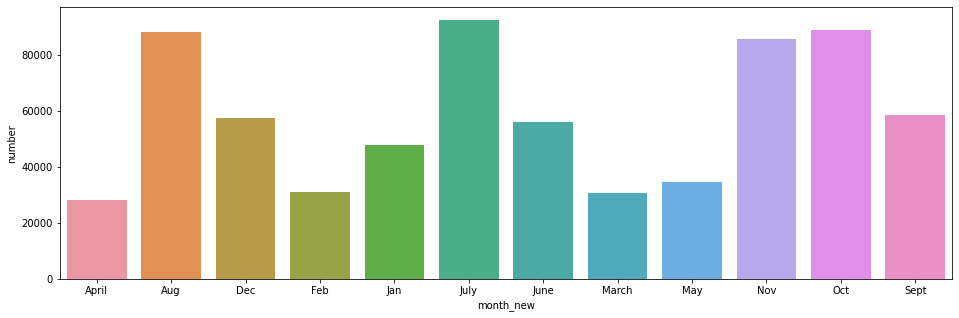

In [33]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y='number',data=data1)

<h1>In which year maximum number of forest fires were reported</h1>

In [39]:
data.groupby('year')['number'].sum().max()

42760.674000000006

In [51]:
data2=data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot:xlabel='year', ylabel='number'>

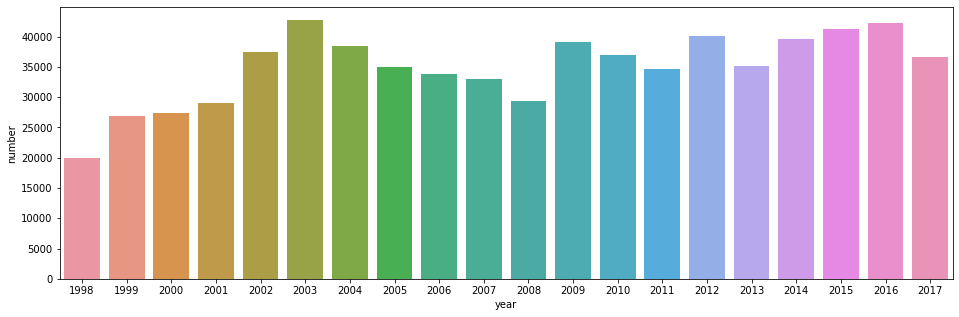

In [41]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y='number',data=data2)

In [47]:
data2[data2['number'].max()==data2['number']]

,year,number
5,2003,42760.674


In [48]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

<h1>In which state maximum number of forest fires were reported</h1>

In [50]:
data3=data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


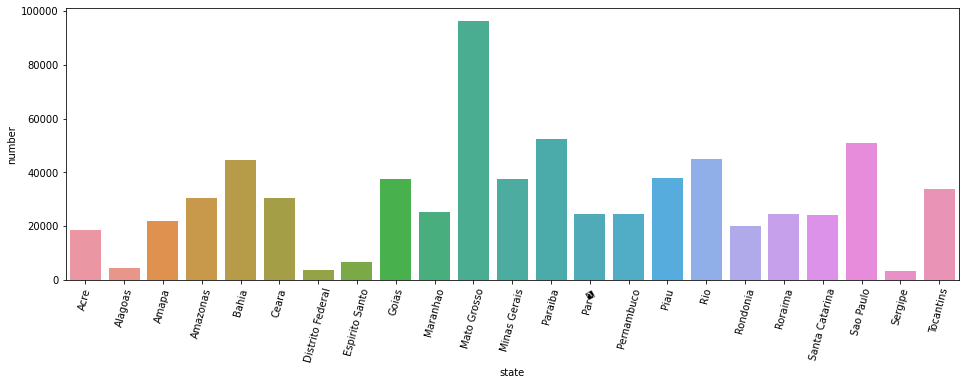

In [57]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y='number',data=data3)
plt.xticks(rotation=75)
plt.show()

<h1>Total number of forest fires were reported in Amazonas</h1>

In [59]:
data3[data3['state']=='Amazonas']

,state,number
3,Amazonas,30650.129


In [60]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

<h1>Display number of forest fires were reported in Amazonas(Year-wise)</h1>

In [63]:
data4=data[data['state']=='Amazonas']
data5=data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='year', ylabel='number'>

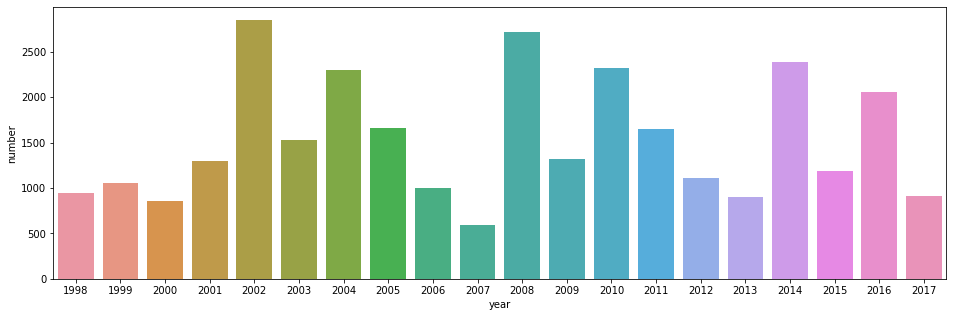

In [64]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y='number',data=data5)

<h1>Display number of forest fires were reported in Amazonas(Day-wise)</h1>

In [65]:
data4

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,Jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,Jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,Jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,Jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,Jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,Dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,Dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,Dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,Dec


In [74]:
day=data4.groupby(data4['date'].dt.dayofweek).sum().number

import calendar
day.index=[calendar.day_name[x] for x in range(0,7)]
day=day.reset_index()

In [75]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<AxesSubplot:xlabel='index', ylabel='number'>

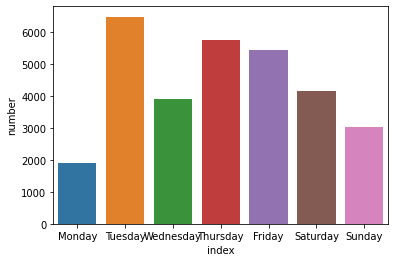

In [76]:
sns.barplot(x="index",y="number",data=day)

<h1>Find Total Number of Fires were Reported in 2015 and visualize Data Based on Each "Month"</h1>

In [78]:
data6=data[data['year']==2015]
data7=data6.groupby('month_new')['number'].sum().reset_index()
data7

,month_new,number
0,April,2573.000
1,Aug,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,Nov,4034.518


<AxesSubplot:xlabel='month_new', ylabel='number'>

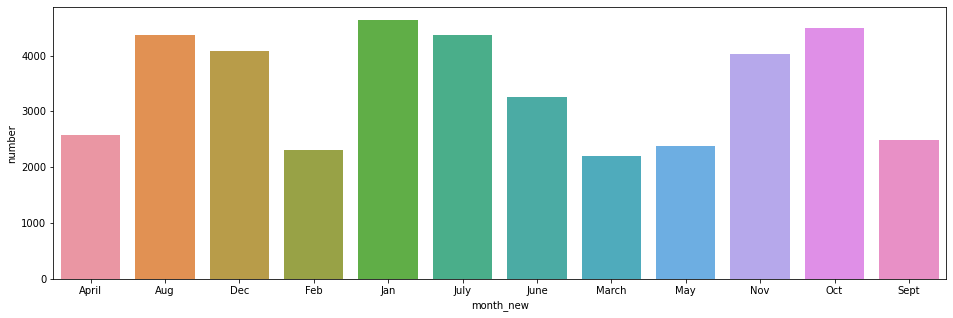

In [79]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y='number',data=data7)

<h1>Find Average Number of Fires were Reported from Highest to Lowest(State-wise)</h1>

In [80]:
data.head(10)

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan
5,2003,Acre,Janeiro,10.0,2003-01-01,Jan
6,2004,Acre,Janeiro,0.0,2004-01-01,Jan
7,2005,Acre,Janeiro,12.0,2005-01-01,Jan
8,2006,Acre,Janeiro,4.0,2006-01-01,Jan
9,2007,Acre,Janeiro,0.0,2007-01-01,Jan


In [84]:
data8=data.groupby("state")['number'].mean().sort_values(ascending=False).reset_index()

In [85]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


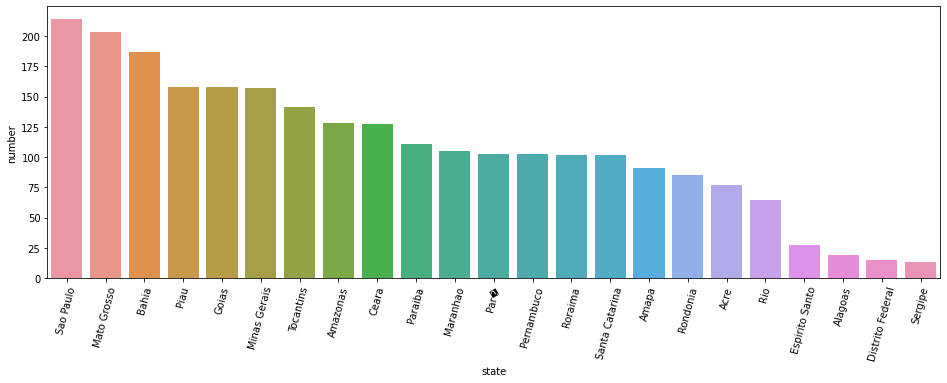

In [87]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y='number',data=data8)
plt.xticks(rotation=75)
plt.show()

In [89]:
data[data['month_new']=='Dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Par�', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)